# Libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from IPython.display import display

# Dataset & Preprocessing

In [2]:
# Load the dataset
data = pd.read_csv('placementdata.csv')

# Display the first few rows of the dataset
data.head()


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [3]:
# Drop rows with missing values
data.dropna(inplace=True)

In [4]:
# Count the number of students placed and not placed
placement_counts = data['PlacementStatus'].value_counts()
print("Placement Status Counts:")
print(placement_counts)

Placement Status Counts:
PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64


In [5]:
# Data Preprocessing

# Drop the StudentID column
data.drop(columns=['StudentID'], inplace=True)

# Define Categorical, Numerical Features & Target
categorical_columns = ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']
numerical_columns = [col for col in data.columns if col not in categorical_columns]
target = 'PlacementStatus'

# Encode Categorical Features (Excluding Target)
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale Only Numerical Features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
print("Preprocessed Data:")
print(data.head())

Preprocessed Data:
       CGPA  Internships  Projects  Workshops/Certifications  \
0 -0.309343    -0.073889 -1.182822                 -0.014598   
1  1.877818    -1.575689  1.121526                  1.091319   
2 -0.621794    -0.073889 -0.030648                  1.091319   
3 -0.309343    -0.073889 -1.182822                  1.091319   
4  0.940464    -0.073889 -0.030648                  1.091319   

   AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0          -1.770910          0.184742                          0   
1           1.292970         -0.787072                          1   
2           0.312528          1.156555                          1   
3           0.680194          0.184742                          1   
4           0.802749          0.427695                          1   

   PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  
0                  0  -0.782306   0.504368                0  
1                  1   0.847618   0.840726               

In [6]:
# Split the data into training and testing sets
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification

In [7]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

# Initialize results dictionary
results = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'Training Time': [],
    'Prediction Time': []
}


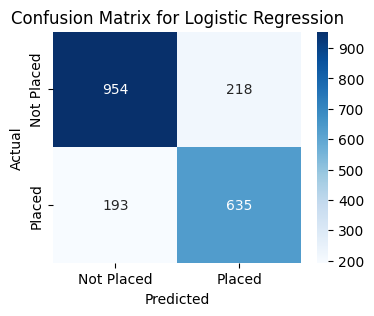

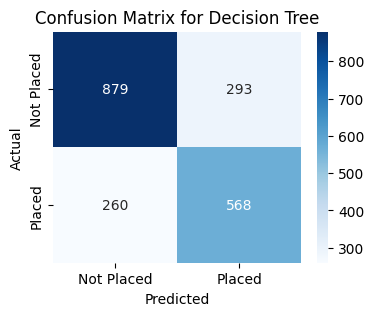

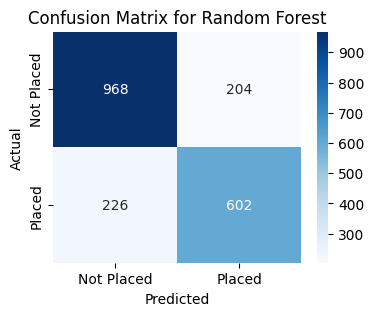

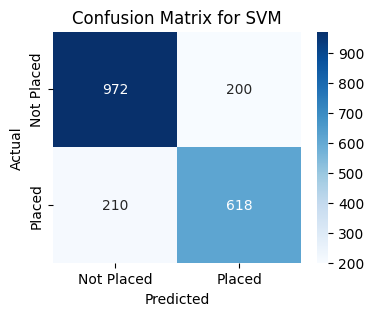

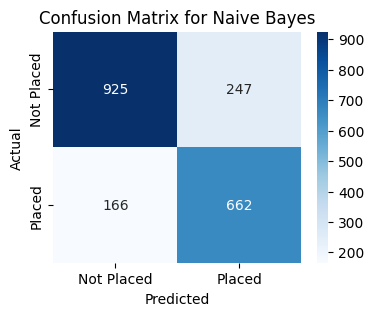

,Model,Accuracy,F1 Score,Training Time,Prediction Time
0,Logistic Regression,0.7945,0.755503,0.039840,0.010096
1,Decision Tree,0.7235,0.672587,0.047259,0.000000
2,Random Forest,0.7850,0.736842,1.462368,0.050597
3,SVM,0.7950,0.750911,2.550898,1.021429
4,Naive Bayes,0.7935,0.762234,0.015610,0.000000


In [8]:
# Train and evaluate each classifier
for name, clf in classifiers.items():
    start_train_time = time.time()
    clf.fit(X_train, y_train)
    end_train_time = time.time()
    
    start_pred_time = time.time()
    y_pred = clf.predict(X_test)
    end_pred_time = time.time()
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    train_time = end_train_time - start_train_time
    pred_time = end_pred_time - start_pred_time
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)
    results['Training Time'].append(train_time)
    results['Prediction Time'].append(pred_time)
    
    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display the results table
display(results_df)

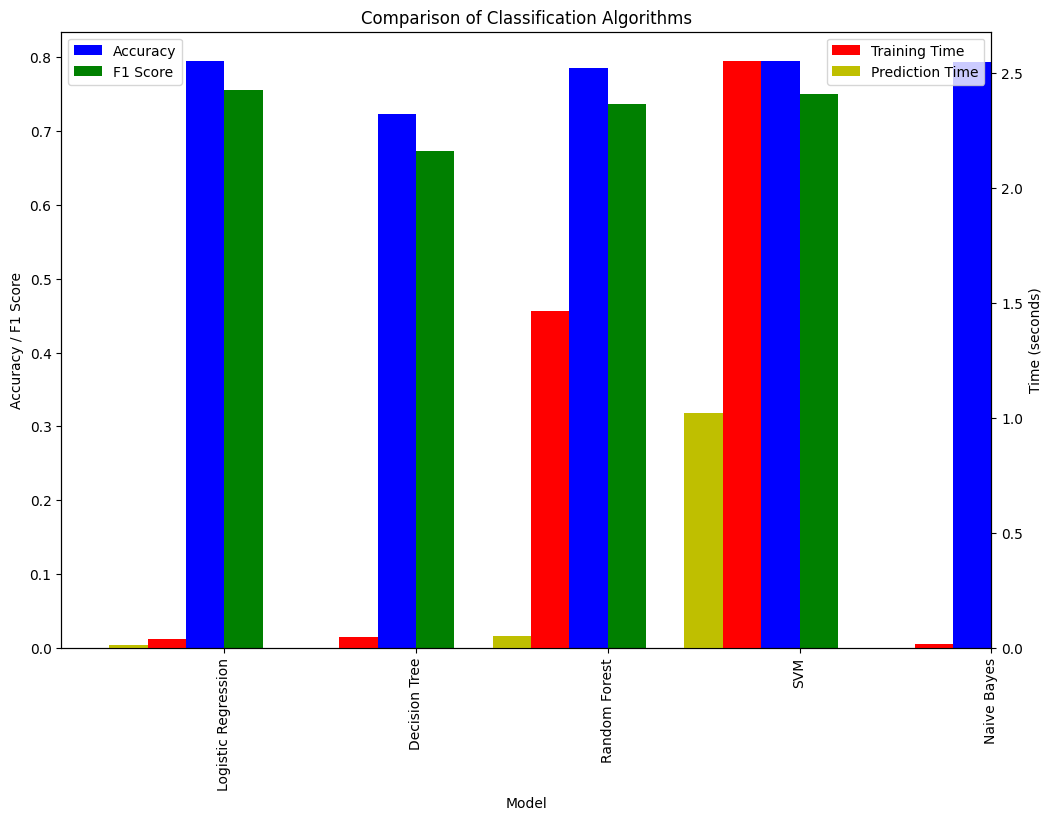

In [9]:
# Plot the comparison graph
fig, ax1 = plt.subplots(figsize=(12, 8))

ax2 = ax1.twinx()
width = 0.2

results_df.plot(kind='bar', x='Model', y='Accuracy', ax=ax1, position=1, width=width, legend=False, color='b')
results_df.plot(kind='bar', x='Model', y='F1 Score', ax=ax1, position=0, width=width, legend=False, color='g')
results_df.plot(kind='bar', x='Model', y='Training Time', ax=ax2, position=2, width=width, legend=False, color='r')
results_df.plot(kind='bar', x='Model', y='Prediction Time', ax=ax2, position=3, width=width, legend=False, color='y')

ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy / F1 Score')
ax2.set_ylabel('Time (seconds)')
ax1.set_title('Comparison of Classification Algorithms')

ax1.legend(['Accuracy', 'F1 Score'], loc='upper left')
ax2.legend(['Training Time', 'Prediction Time'], loc='upper right')

plt.show()